In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import metrics

import seaborn as sns

In [2]:
train = pd.read_csv('resources/creditcard.csv')

In [3]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
train.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

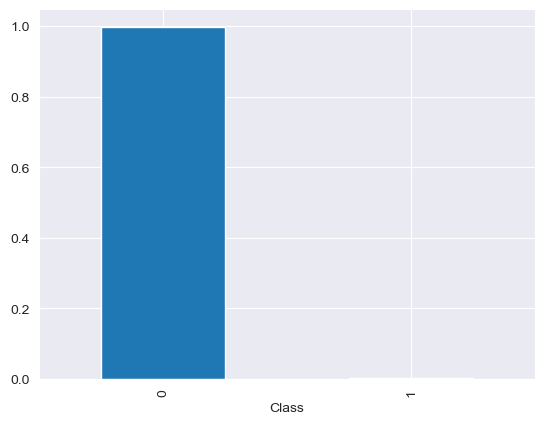

In [7]:
train.Class.value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Amount', ylabel='Class'>

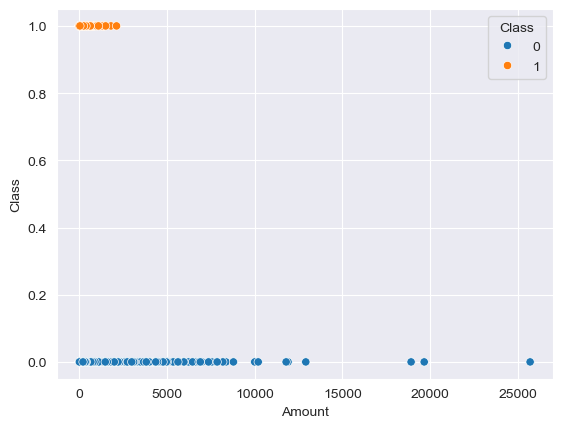

In [8]:
sns.scatterplot(x = "Amount", y = "Class", hue = "Class", data = train)

In [9]:
train.shape

(284807, 31)

1. Oversampling

    1. 0 - 284315
    2. 1 - 284315

2. Undersampling

    1. 0 - 492
    2. 1 - 492

In [10]:
X = train.drop(columns = "Class")

In [11]:
y = train["Class"]

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Stratified Split (Important)

In [13]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [14]:
train.Class.value_counts(),train_y.value_counts(), test_y.value_counts()

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [15]:
train.Class.value_counts(normalize="true"),train_y.value_counts(normalize="true"), test_y.value_counts(normalize="true")

(Class
 0    0.998273
 1    0.001727
 Name: proportion, dtype: float64,
 Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [16]:
model_unbalanced = LogisticRegression(max_iter=10000)
model_unbalanced.fit(train_X, train_y)

LogisticRegression(max_iter=10000)

In [17]:
train_pred = model_unbalanced.predict(train_X)
test_pred = model_unbalanced.predict(test_X)

In [18]:
print('Train Accuracy : ', accuracy_score(train_y, train_pred))
print('Test Accuracy : ', accuracy_score(test_y, test_pred))

Train Accuracy :  0.9992407118874673
Test Accuracy :  0.9991046662687406


In [19]:
print('Train Confusion Matrix : \n', confusion_matrix(train_y, train_pred))
print('Test Confusion Matrix : \n', confusion_matrix(test_y, test_pred))

Train Confusion Matrix : 
 [[227421     30]
 [   143    251]]
Test Confusion Matrix : 
 [[56854    10]
 [   41    57]]


In [20]:
print('Train Classification Report : \n', classification_report(train_y, train_pred))
print('Test Classification Report : \n', classification_report(test_y, test_pred))

Train Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.64      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Test Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.58      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
print('Train ROC_AUC_SCORE : \n', roc_auc_score(train_y, train_pred))
print('Test ROC_AUC_SCORE : \n', roc_auc_score(test_y, test_pred))

Train ROC_AUC_SCORE : 
 0.818461970511549
Test ROC_AUC_SCORE : 
 0.7907283974366337


In [22]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [23]:
test_y_proba = model_unbalanced.predict_proba(test_X)[:,1]

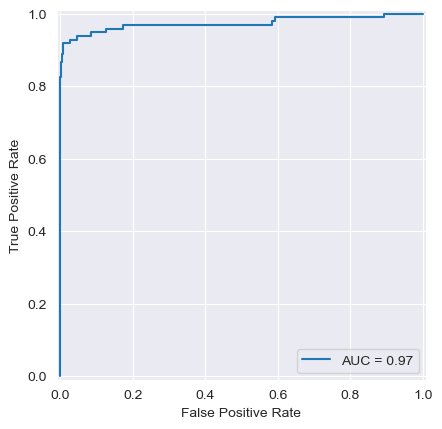

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

Metrics calculated for various thresholds.


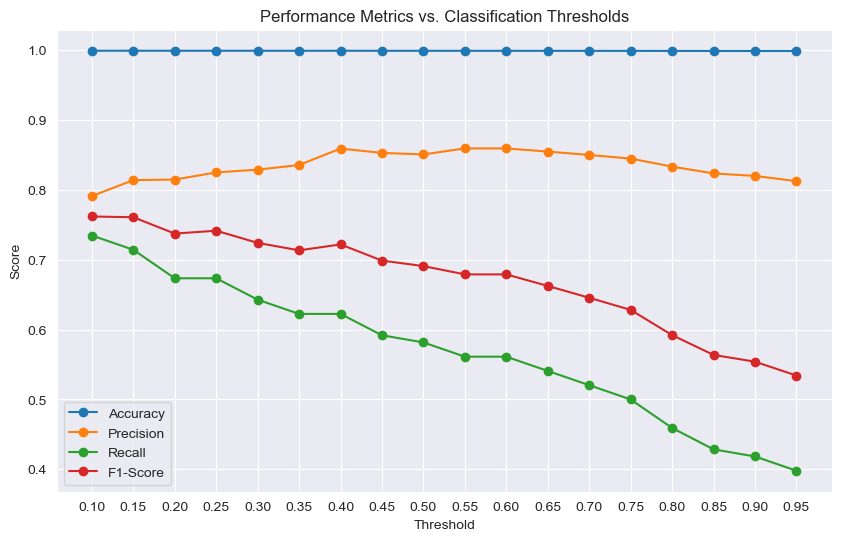

In [25]:
# Generate a range of classification thresholds
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate through each threshold and calculate metrics
for threshold in thresholds:
    y_pred_threshold = (test_y_proba >= threshold).astype(int)

    accuracy_scores.append(accuracy_score(test_y, y_pred_threshold))
    precision_scores.append(precision_score(test_y, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(test_y, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(test_y, y_pred_threshold, zero_division=0))

print("Metrics calculated for various thresholds.")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')

plt.title('Performance Metrics vs. Classification Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

Plotting of performance metrics against classification thresholds is complete.


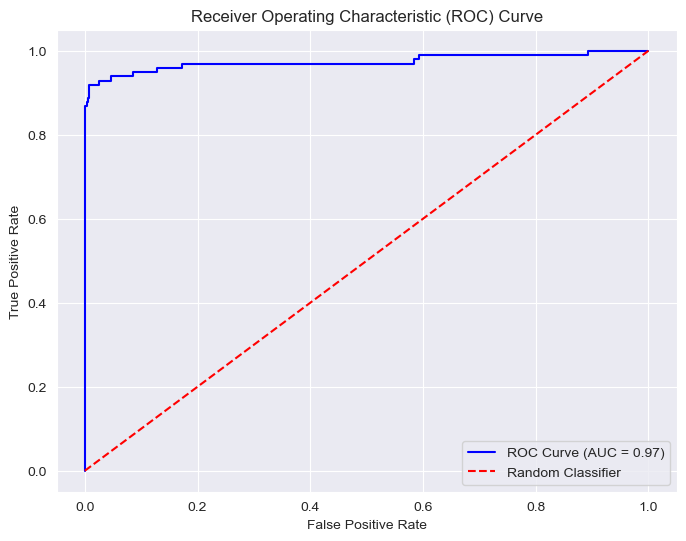

AUC Score: 0.97


In [26]:
print('Plotting of performance metrics against classification thresholds is complete.')

# Calculate FPR and TPR for the ROC curve
fpr, tpr, thresholds = roc_curve(test_y, test_y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(test_y, test_y_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
auc_score = roc_auc_score(test_y, test_y_proba)
print(f"AUC Score: {auc_score:.2f}")

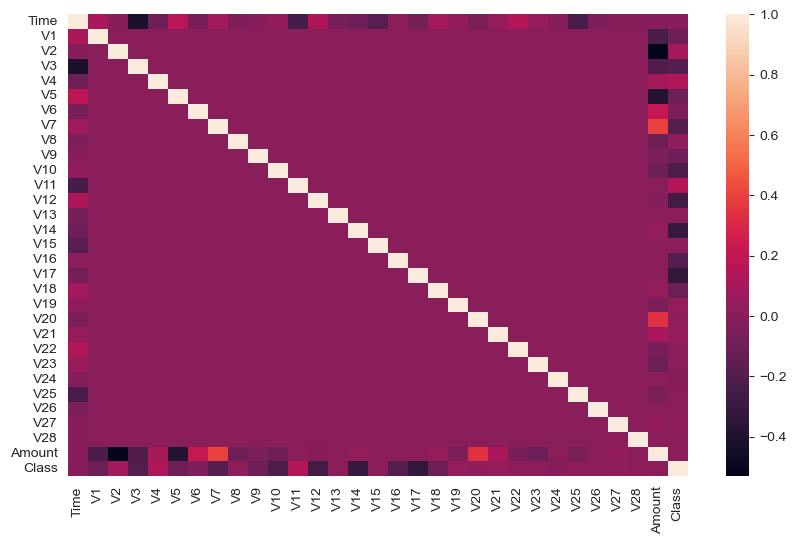

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr())
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

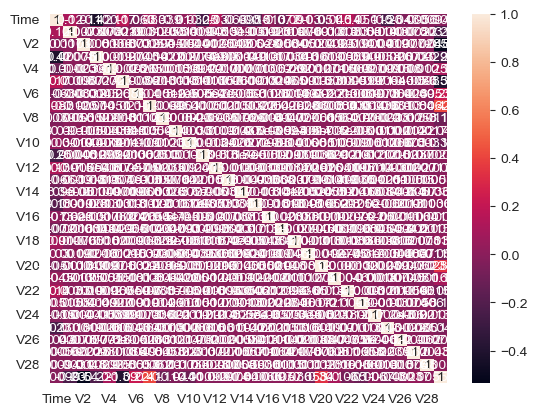

In [29]:
scale = StandardScaler()
train_X_scaler = pd.DataFrame(scale.fit_transform(train_X), columns=train_X.columns)
sns.heatmap(train_X_scaler.corr(), annot=True)
plt.show()